### 03 Image correlation of EBSD IPF map and SEM image 
This notebook demonstrates the process for correlating EBSD IPF map with SEM image by manual feature registration. By correlating the two imaging modes, the scan distortion of EBSD map is minimized. Additionally, the EBSD orientation information is accurately linked to the corresponding stage positions. Therefore, by clicking on the correlated interactive map, the Eular angles, stage position can be easily retrieved, hence making the navigation more user friendly.

#### Load dependent packages

In [9]:
import sys
sys.path.append("..")

import os
from pathlib import Path
from src import optimization

#### Load/locate the required data files
- A EBSD map file from the sample of interest (A EBSD file from an austenitic stainless steel sample is used here)
- A SEM image from the area that has been mapped by EBSD. This is usually a backscattered electron (BSE) image at a slightly lower magnification to provide grain contrast of the polycrystal sample.

In [10]:
fe_xmap_path = Path("../data/ebsd_map/")
fe_xmap_file = "20kv_26nA_15mm WD_4x4 bin_fcc_Fe Map.ctf"
fe_xmap_fname = os.path.join(fe_xmap_path, fe_xmap_file)

sem_path = Path("../data/fcc_fe/")
sem_file = "01_steel overview.tif"
sem_fname = os.path.join(sem_path, sem_file)

#### Instantiate a new ipf_image_correlation object and set two parameters as input. 

Input parameters for the ipf_image_correlation object are:<br>
- `sem_fname` the location of the overview SEM image file that has been mapped by EBSD
- `fe_xmap_fname` the location of the EBSD crystal map file

The information of the EBSD crystal map, e.g. the phase names etc., are summarized as output once the object is instantiated.

In [11]:
correlation = optimization.ipf_image_correlation(sem_fname, fe_xmap_fname)

Phase     Orientations         Name  Space group  Point group  Proper point group     Color
   -1      8358 (2.5%)  not_indexed         None         None                None         w
    1   322978 (97.5%)     Iron fcc        Fm-3m         m-3m                 432  tab:blue
Properties: bands, error, MAD, BC, BS
Scan unit: um


#### Get the EBSD ipf map image of a specified phase from crystal map file

The function `correlation.get_ipf_map` is to get the EBSD map from the orientation map file. Set the `phase_name` to one of the phase names in the output list above. By default, the variable `plot` is set to `True` to plot the EBSD IPF map with band contrast as overlay to highlight the grain boundaries. Set it to `False` to suppress the output.


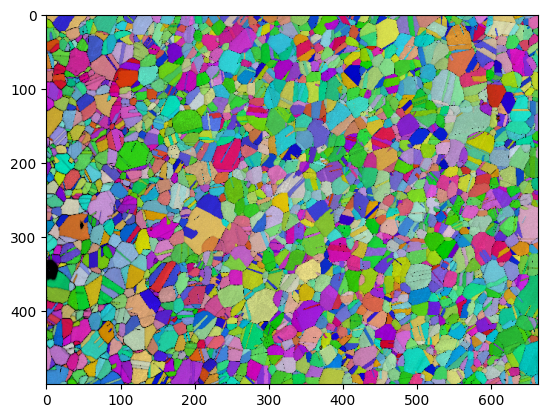

In [12]:
fe_ipf_map = correlation.get_ipf_map(phase_name="Iron fcc", plot=True)

#### Mark the 
Note that the `%matplotlib qt` is a IPhython [magic function](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained)

In [5]:
%matplotlib qt
correlation.get_ipf_points()

In [6]:
correlation.get_sem_points()

In [13]:
correlation.load_alignment_points(load_path="alignment_points.pkl")

24 alignment points have been loaded.


In [7]:
correlation.save_alignment_points(save_path="alignment_points.pkl")

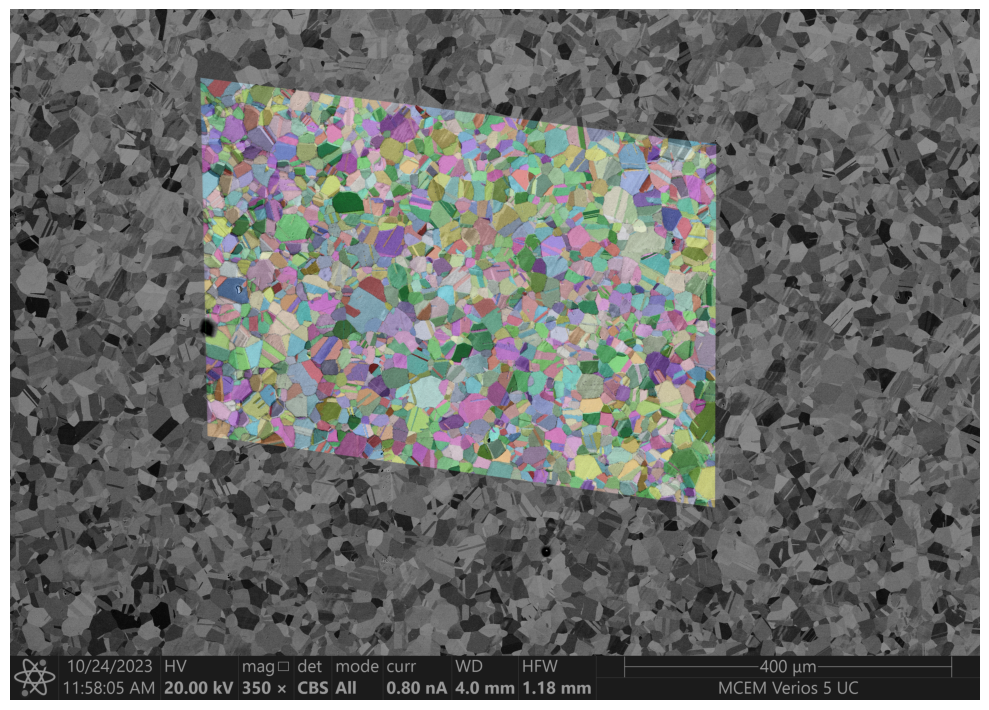

In [14]:
%matplotlib inline
blended_ipf, inverse_transformation_matrix = correlation.process(plot=True)